In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft 

In [3]:
def ft(f, k, xs, dx, q=0):
    result = 0
    for x in xs:
        result += f(x,q) * np.exp(-1j * k * x)

    return result * dx

def ft2d(f, kx, ky, xs, ys, dx, dy, q=0):
    result = 0
    for x in xs:
        for y in ys:
            result += f(x, y ,q) * np.exp(-1j * kx * x) *np.exp(-1j * ky * y)
    return result * dx * dy

def hermite_pol(x, g):
    return (x)

def g(x, a):
    if np.abs(x) < a:
        return 1/(2*a)
    else:
        return 0

def f(x, q):
    return np.exp(-x**2) * np.cos(q*x)

def fri(f):
    v1 = np.real(f)
    v2 = np.imag(f)
    a = np.zeros_like(v1)
    b = np.zeros_like(v2)

    for n in range(len(v1)):
        if np.abs(v1[n]) > 10e-12:
            a[n] = v1[n]

    for n1 in range(len(v2)):
        if np.abs(v2[n1]) > 10e-10:
            b[n1] = v2[n1]

    return np.array([a, b])


def f2d(x, y, q):
    return np.exp(-x**2) * np.exp(-y**2) * np.cos(q*x)**2 #np.exp(1j*q*x)

In [ ]:
# plota a funcão f
xs = np.linspace(-4, 4, 100)
dx = xs[1] - xs[0]
plt.plot(xs, f(xs, 2))

In [ ]:
# calcula transformada de fourier da função f
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
dx = x[1] - x[0]
dy = y[1] - y[0]
z = [ ft(f, k, x, dx, q=2) for k in x ]

In [ ]:
value = 40
ni = 10
dk = 2*ni/value
x = np.linspace(-ni, ni, value)
y = np.linspace(-ni, ni, value)
dx = x[1] - x[0]
dy = y[1] - y[0]
kni = 15
kx = np.linspace(-kni, kni, value)
ky = np.linspace(-kni, kni, value)
z = np.zeros((len(kx), len(ky)), dtype='complex')
for i in range(len(kx)):
    for j in range(len(ky)):
        z[j,i] = ft2d(f2d, kx[i], ky[j], x, y, dx, dy, q=1)


In [ ]:
plt.pcolormesh(kx, ky, np.abs(z))
plt.colorbar()

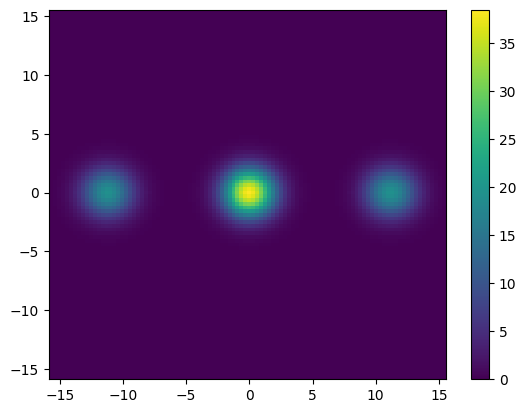

In [10]:
#E se o scipy existisse?
value = 100
ni = 10
x = np.linspace(-ni, ni, value)
y = np.linspace(-ni, ni, value)
dk = 2*ni/value
x2, y2 = np.meshgrid(x, y)
z2 = f2d(x2, y2, q=10)
ftz = fft.fftshift(fft.fft2(z2))
kx , ky = np.meshgrid(2*np.pi*fft.fftshift(fft.fftfreq(value, dk)), 2*np.pi*fft.fftshift(fft.fftfreq(value, dk)))
plt.pcolormesh(kx, ky, np.abs(ftz))
plt.colorbar()

In [ ]:
# plota a transformada da função em 2 dimensões imag x real

axis = np.array(fri(z))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x, axis[0] , axis[1])

ax.set_xlabel('X')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [ ]:
plt.plot(x, np.real(z))

In [ ]:
xs = np.linspace(-4, 4, 1000)
ys = np.linspace(-4, 4, 1000)
dx = xs[1] - xs[0]
dy = ys[1] - ys[0]
xg, yg = np.meshgrid(xs,ys)
plt.contourf(xg,yg, f2d(xg, yg, 10))

In [ ]:
value = 70
ni = 10
dk = 2*ni/value
x = np.linspace(-ni, ni, value)
y = np.linspace(-ni, ni, value)
dx = x[1] - x[0]
dy = y[1] - y[0]
kni = 15
kx = np.linspace(-kni, kni, value)
ky = np.linspace(-kni, kni, value)